In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import nltk
# from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF
from nltk.tokenize import word_tokenize # tokenisasi
from nltk.corpus import stopwords # deteksi stopword
from nltk.stem import SnowballStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [28]:
df = pd.read_csv('dataset_tweet_sentiment_cellular_service_provider.csv')
df.head(100)

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDER_NAME>"
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja <URL>
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>
5,6,negative,Untuk penembakan paket dari <PRODUCT_NAME> masih gangguan ya <PROVIDER_NAME>
6,7,positive,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, paket <PRODUCT_NAME> nya udah off tapi gantinya ada paket <PRODUCT_NAME> yg bisa gratisan youtube, senang banget <PROVIDER_NAME>"
7,8,negative,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lagi dalam kamus perhapean saya. #Boikot<PROVIDER_NAME> <URL>
8,9,negative,keluhan gak ditanggapi. bikin emosi aja. pulsaku dicuri terus. soak deh. masa setiap hari pulsa berkurang 1500-2100 bisa 2-3*/hari
9,10,negative,#Bilboard iklan <PROVIDER_NAME> kok ada pesan tersembunyi? #Boikot<PROVIDER_NAME> #Ramadhan <URL>


In [29]:
def text_cleaning(text):
    text = text.lower()
    text = text.replace('<user_mention>', '')
    text = text.replace('<provider_name>', '')
    text = text.replace('<product_name>', '')
    text = text.replace('<url>', '')
    
    text = text.replace('..', ' ')
    text = text.replace('...', ' ')
    text = text.replace('....', ' ')
    
    text = text.encode('ascii', 'replace').decode('ascii') # remove non ASCII (emoticon, chinese word, .etc)
    text = text.replace(r'\d+', "") # remove digits
    text = text.translate(str.maketrans("","",string.punctuation)) #remove punctuation
    text = text.strip() # remove whitespace from the beginning and end
    text = re.sub(r'\s+',' ', text) # remove multiple whitespace

    return text

In [30]:
df['text_clean'] = df['Text Tweet'].apply(lambda x: text_cleaning(x))

In [31]:
df[['text_clean']]

,text_clean
0,boikot gunakan produk bangsa sendiri
1,saktinya balik lagi alhamdulillah v
2,selamat pagi bisa bantu kenapa di dalam kamar sinyal 4g hilang yang 1 lagi panggilan darurat saja
3,dear akhir2 ini jaringan data lemot banget padahal h
4,selamat malam pendusta
5,untuk penembakan paket dari masih gangguan ya
6,aku pakai paket nya udah off tapi gantinya ada paket yg bisa gratisan youtube senang banget
7,rt tak ada lagi dalam kamus perhapean saya boikot
8,keluhan gak ditanggapi bikin emosi aja pulsaku dicuri terus soak deh masa setiap hari pulsa berkurang 15002100 bisa 23hari
9,bilboard iklan kok ada pesan tersembunyi boikot ramadhan


In [32]:
tala = pd.read_csv('StopWords_Tala.csv')
tala.head(1)

,LEMA
0,ada


In [33]:
stopwords_tala = set(tala['LEMA'])
stopwords_tala

{'pilarbbaru',
 'confusionkami',
 'sekwli',
 'pekerjjan',
 'mnis',
 'indria',
 'nailatul',
 'satuannya',
 'muad',
 'penangaanan',
 'bpkbconfusion',
 'pernohonan',
 'mnding',
 'dirembes',
 'pelaopran',
 'beerssihkan',
 'sampahserak',
 'asslmmualaikum',
 'sedngkn',
 'bajaringan',
 'fzn',
 'perseta',
 'saraswaticonfusion',
 'fatthul',
 'berantakanconfusion',
 'sururi',
 'demikisn',
 'teatre',
 'clipcard',
 'musholabaiturahman',
 'riandi',
 'biarinin',
 'kacalah',
 'lingkunvan',
 'puskesad',
 'merorngrong',
 'disyukuri',
 'uderpass',
 'sethunan',
 'ancoorr',
 'duduku',
 'giman',
 'diikatbtali',
 'reses',
 'iklitempelan',
 'diminimalkan',
 'hncur',
 'gkin',
 'pemerontah',
 'syahputro',
 'swissbell',
 'ngadaiin',
 'solusinyakah',
 'danj',
 'akadconfusion',
 'mendapatnya',
 'panasin',
 'jubileconfusion',
 'korelasinya',
 'didistribukan',
 'pasdicopot',
 'berwajibconfusion',
 'sampaikn',
 'laanjut',
 'klap',
 'djppr',
 'diertibkan',
 'dijalananan',
 'assurrur',
 'handshugging',
 'hidayahnya',


In [34]:
# Create function
def remove_stopwords(text):
    return ' '.join([i for i in text if i not in stopwords_tala])

In [35]:
df['tweet_stem_tala'] = df['text_clean'].apply(lambda x: remove_stopwords(x.split()))
df[['tweet_stem_tala']]

,tweet_stem_tala
0,boikot produk bangsa
1,saktinya alhamdulillah v
2,pagi bantu kamar sinyal 4g hilang 1 panggilan darurat
3,akhir2 jaringan data lemot h
4,malam
5,penembakan paket gangguan
6,pakai paket udah off gantinya paket gratisan youtube senang
7,rt kamus perhapean boikot
8,keluhan gak ditanggapi bikin emosi pulsaku dicuri deh pulsa berkurang 15002100 23hari
9,bilboard iklan pesan tersembunyi boikot ramadhan


In [36]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem(text):
    """
    :param text:
    :return: stemmed text
    """
    return stemmer.stem(text)

In [51]:
df

,Id,Sentiment,Text Tweet,text_clean,tweet_stem_tala
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>,boikot gunakan produk bangsa sendiri,boikot produk bangsa
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDER_NAME>",saktinya balik lagi alhamdulillah v,saktinya alhamdulillah v
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja <URL>,selamat pagi bisa bantu kenapa di dalam kamar sinyal 4g hilang yang 1 lagi panggilan darurat saja,pagi bantu kamar sinyal 4g hilang 1 panggilan darurat
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!,dear akhir2 ini jaringan data lemot banget padahal h,akhir2 jaringan data lemot h
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta,malam
5,6,negative,Untuk penembakan paket dari <PRODUCT_NAME> masih gangguan ya <PROVIDER_NAME>,untuk penembakan paket dari masih gangguan ya,penembakan paket gangguan
6,7,positive,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, paket <PRODUCT_NAME> nya udah off tapi gantinya ada paket <PRODUCT_NAME> yg bisa gratisan youtube, senang banget <PROVIDER_NAME>",aku pakai paket nya udah off tapi gantinya ada paket yg bisa gratisan youtube senang banget,pakai paket udah off gantinya paket gratisan youtube senang
7,8,negative,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lagi dalam kamus perhapean saya. #Boikot<PROVIDER_NAME> <URL>,rt tak ada lagi dalam kamus perhapean saya boikot,rt kamus perhapean boikot
8,9,negative,keluhan gak ditanggapi. bikin emosi aja. pulsaku dicuri terus. soak deh. masa setiap hari pulsa berkurang 1500-2100 bisa 2-3*/hari,keluhan gak ditanggapi bikin emosi aja pulsaku dicuri terus soak deh masa setiap hari pulsa berkurang 15002100 bisa 23hari,keluhan gak ditanggapi bikin emosi pulsaku dicuri deh pulsa berkurang 15002100 23hari
9,10,negative,#Bilboard iklan <PROVIDER_NAME> kok ada pesan tersembunyi? #Boikot<PROVIDER_NAME> #Ramadhan <URL>,bilboard iklan kok ada pesan tersembunyi boikot ramadhan,bilboard iklan pesan tersembunyi boikot ramadhan


In [52]:
df_pos = df[df['Sentiment'] == 'positive']
df_pos

,Id,Sentiment,Text Tweet,text_clean,tweet_stem_tala
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>,boikot gunakan produk bangsa sendiri,boikot produk bangsa
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDER_NAME>",saktinya balik lagi alhamdulillah v,saktinya alhamdulillah v
6,7,positive,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, paket <PRODUCT_NAME> nya udah off tapi gantinya ada paket <PRODUCT_NAME> yg bisa gratisan youtube, senang banget <PROVIDER_NAME>",aku pakai paket nya udah off tapi gantinya ada paket yg bisa gratisan youtube senang banget,pakai paket udah off gantinya paket gratisan youtube senang
16,17,positive,<PROVIDER_NAME> <PROVIDER_NAME> kangen nih dapat kiriman pos marchandes nya <PROVIDER_NAME> langsung dari pak pos nya,kangen nih dapat kiriman pos marchandes nya langsung dari pak pos nya,kangen kiriman pos marchandes langsung pos
22,23,positive,Jadi stabil disini. <PROVIDER_NAME> <URL>,jadi stabil disini,stabil
23,24,positive,#CUG <PROVIDER_NAME> #Community Sangat Cocok Buat Komunikasi Antar :. - Keluarga. - Rekan Bisnis / Kerja. - Sekolah / Kampus. - Hubungan Jarak.,cug community sangat cocok buat komunikasi antar keluarga rekan bisnis kerja sekolah kampus hubungan jarak,cug community cocok komunikasi keluarga rekan bisnis kerja sekolah kampus hubungan jarak
32,33,positive,"Hore,,, Akhirnya ada sinyal 4G <PROVIDER_NAME> di Sambu",hore akhirnya ada sinyal 4g di sambu,hore sinyal 4g sambu
33,34,positive,Alhamdulilah dikunjungi para vendor mitra <PROVIDER_NAME> ke #klinikKUMSda… <URL>,alhamdulilah dikunjungi para vendor mitra ke klinikkumsda,alhamdulilah dikunjungi vendor mitra klinikkumsda
41,42,positive,<PROVIDER_NAME> 1berbagi tanpa kuota 2 berbagai kapan saja <PROVIDER_NAME> bagi berkah <USER_MENTION>,1berbagi tanpa kuota 2 berbagai kapan saja bagi berkah,1berbagi kuota 2 berkah
42,43,positive,"<PROVIDER_NAME> bagi berkah 1video ngabuburit dengan anak, video sahur bersama keluarga, video pakai baju koko baru, <USER_MENTION>",bagi berkah 1video ngabuburit dengan anak video sahur bersama keluarga video pakai baju koko baru,berkah 1video ngabuburit anak video sahur keluarga video pakai baju koko


In [53]:
df_neg = df[df['Sentiment'] == 'negative']
df_neg

,Id,Sentiment,Text Tweet,text_clean,tweet_stem_tala
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja <URL>,selamat pagi bisa bantu kenapa di dalam kamar sinyal 4g hilang yang 1 lagi panggilan darurat saja,pagi bantu kamar sinyal 4g hilang 1 panggilan darurat
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!,dear akhir2 ini jaringan data lemot banget padahal h,akhir2 jaringan data lemot h
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta,malam
5,6,negative,Untuk penembakan paket dari <PRODUCT_NAME> masih gangguan ya <PROVIDER_NAME>,untuk penembakan paket dari masih gangguan ya,penembakan paket gangguan
7,8,negative,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lagi dalam kamus perhapean saya. #Boikot<PROVIDER_NAME> <URL>,rt tak ada lagi dalam kamus perhapean saya boikot,rt kamus perhapean boikot
8,9,negative,keluhan gak ditanggapi. bikin emosi aja. pulsaku dicuri terus. soak deh. masa setiap hari pulsa berkurang 1500-2100 bisa 2-3*/hari,keluhan gak ditanggapi bikin emosi aja pulsaku dicuri terus soak deh masa setiap hari pulsa berkurang 15002100 bisa 23hari,keluhan gak ditanggapi bikin emosi pulsaku dicuri deh pulsa berkurang 15002100 23hari
9,10,negative,#Bilboard iklan <PROVIDER_NAME> kok ada pesan tersembunyi? #Boikot<PROVIDER_NAME> #Ramadhan <URL>,bilboard iklan kok ada pesan tersembunyi boikot ramadhan,bilboard iklan pesan tersembunyi boikot ramadhan
10,11,negative,"<PROVIDER_NAME> mampus!!!!! bulan puasa, subuh2 mau sahur cek pulsa tersedot terus. dan sekarang sisa 30 ribu <PROVIDER_NAME> Tolong dibaca!!!",mampus bulan puasa subuh2 mau sahur cek pulsa tersedot terus dan sekarang sisa 30 ribu tolong dibaca,puasa subuh2 sahur cek pulsa tersedot sisa 30 ribu dibaca
11,12,negative,<USER_MENTION> Pernah coba pakai <PROVIDER_NAME> tapi parah koneksinya,pernah coba pakai tapi parah koneksinya,coba pakai parah koneksinya
12,13,negative,"Setuju, <USER_MENTION> silahkan boikot saja pelanggan <PROVIDER_NAME> pendukung #HRS <URL>",setuju silahkan boikot saja pelanggan pendukung hrs,setuju silahkan boikot pelanggan pendukung hrs


In [38]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)

    return kamus

In [57]:
kamus_unclean_pos = kamus(df_pos['tweet_stem_tala'])
kamus_unclean_neg = kamus(df_neg['tweet_stem_tala'])

In [58]:
kamus_unclean_pos.head()

,freq
kata,
pakai,27
lancar,20
g,17
gratis,17
sinyal,15


In [59]:
kamus_unclean_neg.head()

,freq
kata,
g,35
jaringan,27
boikot,26
gak,24
sinyal,16


<Axes: ylabel='kata'>

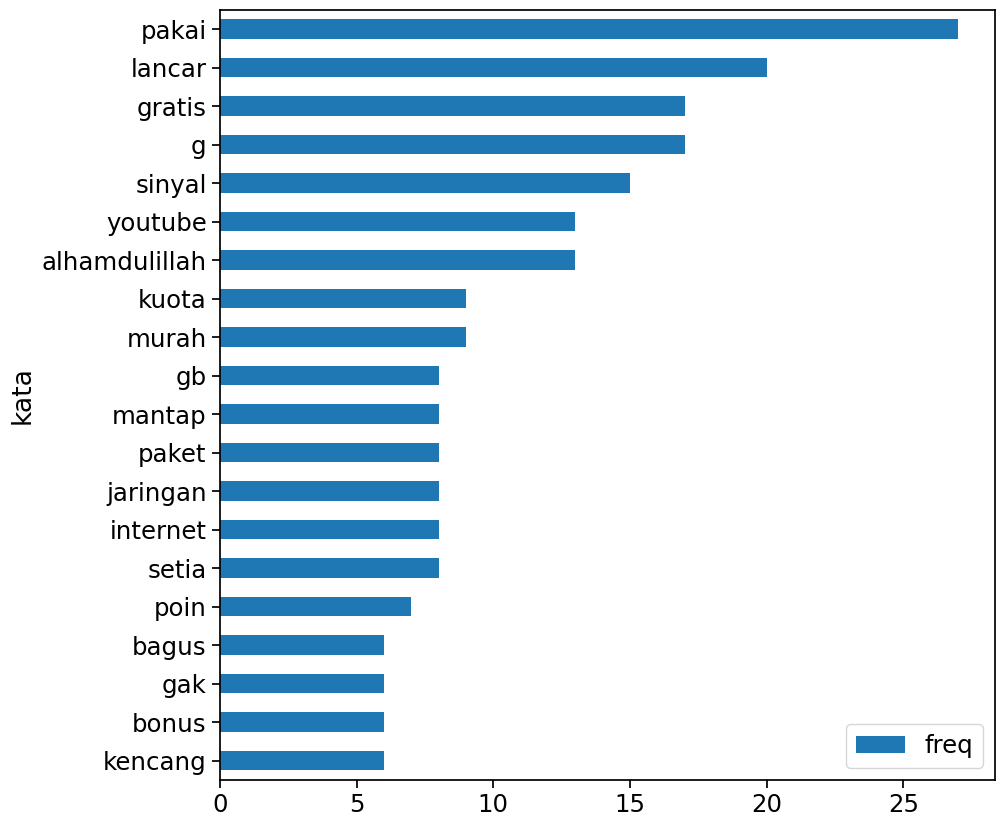

In [60]:
sns.set_context(context = 'notebook', font_scale = 1.6)
kamus_unclean_pos[:20].sort_values(by = 'freq', ascending = True).plot(kind = 'barh',figsize = (10,10))

<Axes: ylabel='kata'>

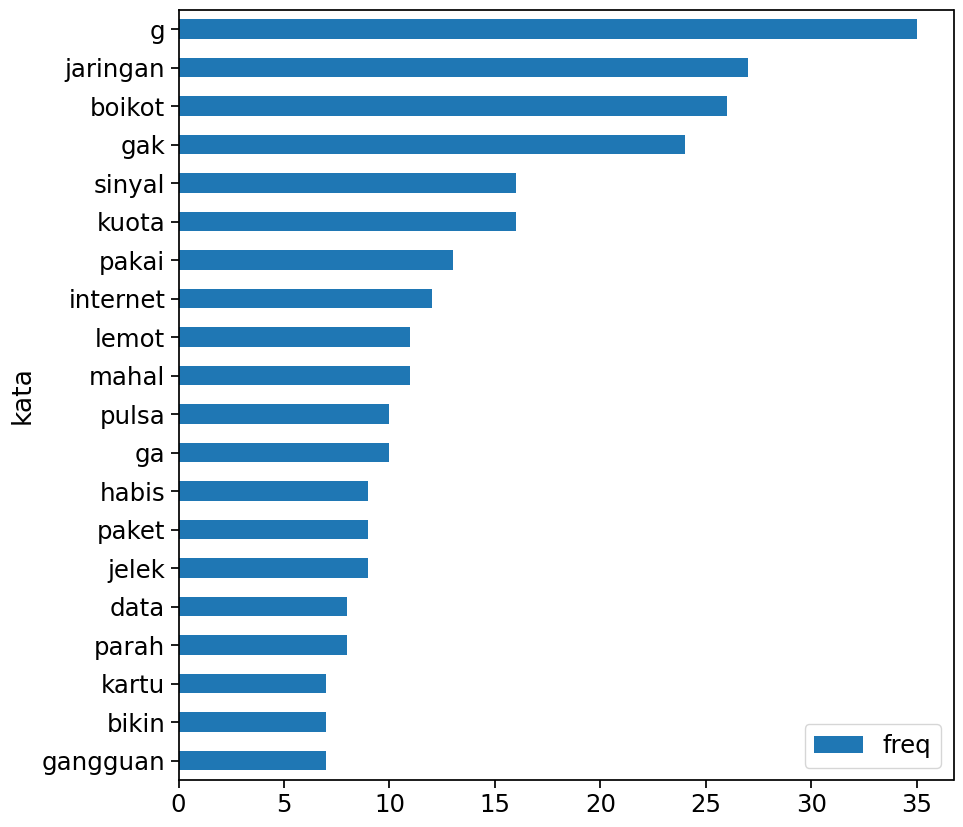

In [61]:
sns.set_context(context = 'notebook', font_scale = 1.6)
kamus_unclean_neg[:20].sort_values(by = 'freq', ascending = True).plot(kind = 'barh',figsize = (10,10))

In [47]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")

In [62]:
word_cloud_pos = WordCloud(background_color='white').generate(str(df_pos['tweet_stem_tala']))

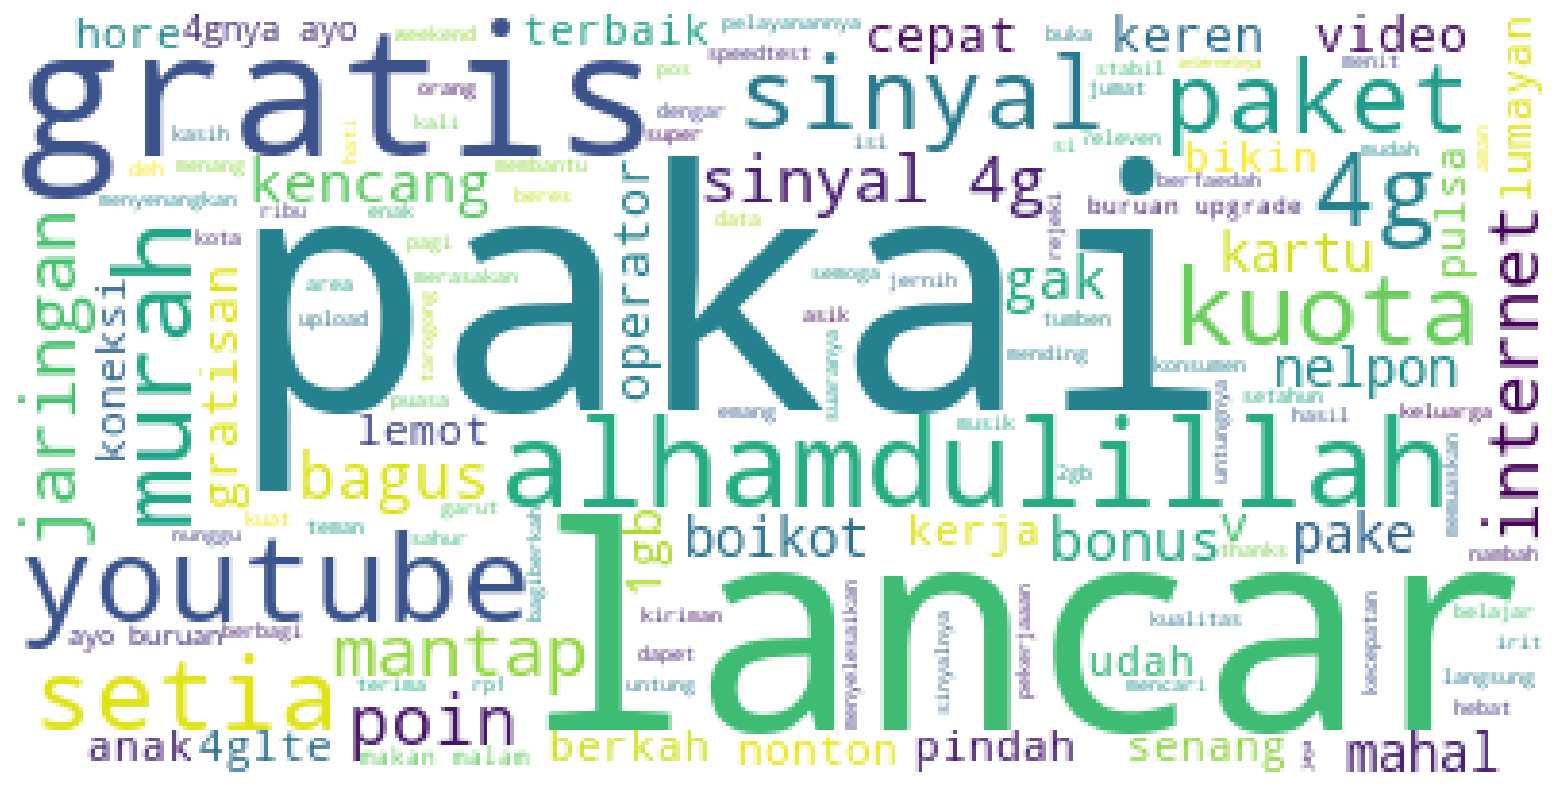

In [63]:
plot_cloud(word_cloud_pos)

In [64]:
word_cloud_neg = WordCloud(background_color='white').generate(str(df_neg['tweet_stem_tala']))

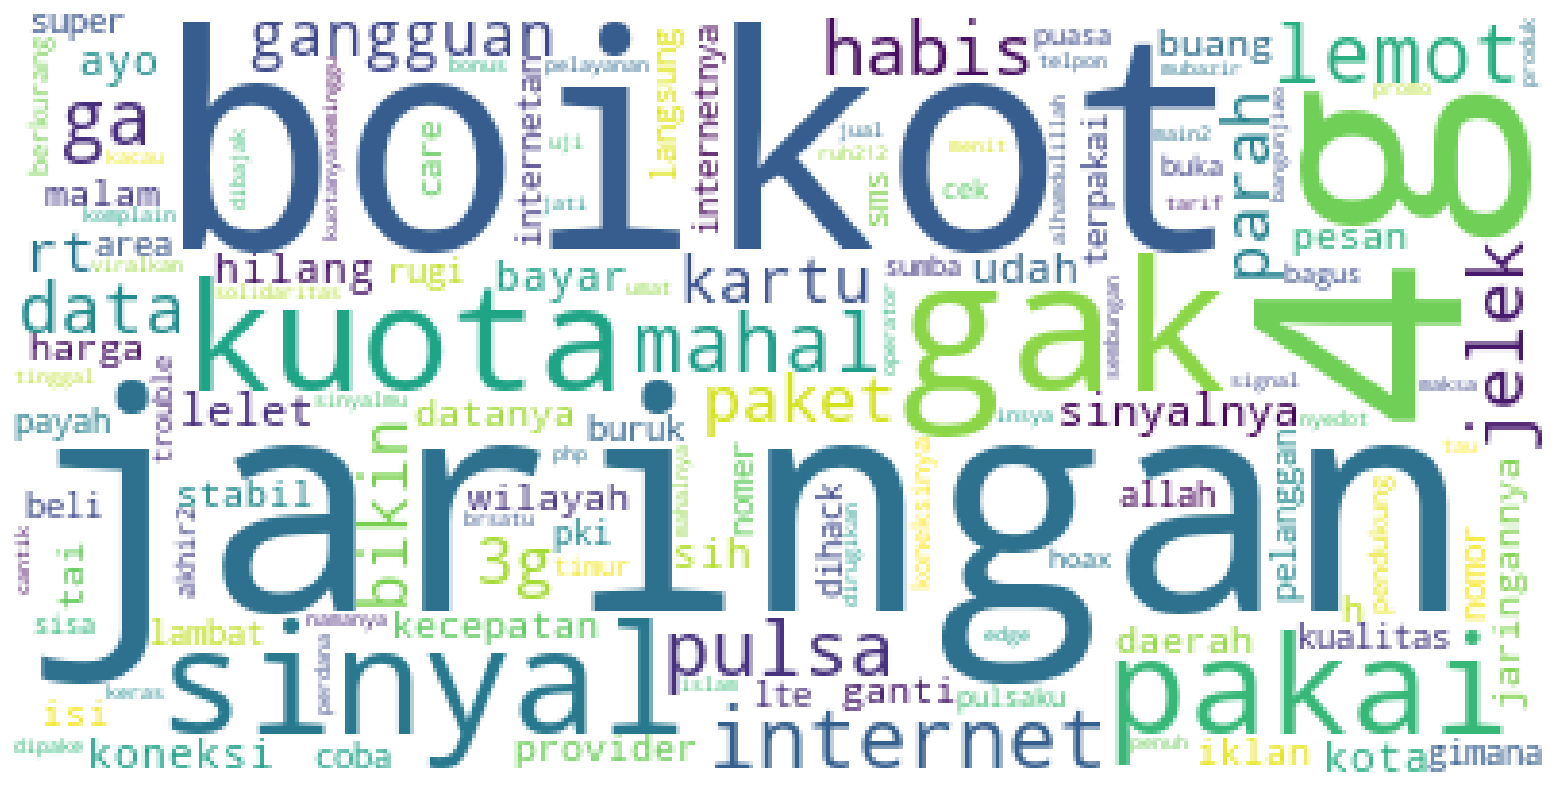

In [65]:
plot_cloud(word_cloud_neg)

Kesimpulan:

- Sentimen Negatif Mendominasi
    - Pengguna banyak mengeluhkan koneksi internet yang lambat, harga yang mahal, sinyal yang sering hilang dan kebingungan soal kuota data. Masalah-masalah ini menunjukkan ketidakpuasan terhadap layanan yang diberikan.
    - Tweet negatif didominasi kata seperti "jaringan", "boikot", dan  "gangguan". Ini menandakan banyak pengguna kecewa dan tidak puas dengan layanan yang mereka terima.
- Risiko Reputasi
    - Sentimen negatif yang terus muncul bisa merusak citra provider. Jika tidak segera diperbaiki, pengguna bisa beralih ke layanan lain yang dianggap lebih baik.

Rekomendasi:
- Tingkatkan kualitas jaringan
- Evaluasi harga dan kuota
- Perkuat respon layanan